In [3]:
import pandas as pd
data = pd.read_json('/workspaces/tarot/archive 2/tarot-images.json')
df = pd.json_normalize(data['cards'])
df.head()

,name,number,arcana,suit,img,fortune_telling,keywords,Archetype,Hebrew Alphabet,Numerology,Elemental,Mythical/Spiritual,Questions to Ask,meanings.light,meanings.shadow,Astrology,Affirmation
0,The Fool,0,Major Arcana,Trump,m00.jpg,"[Watch for new projects and new beginnings, Pr...","[freedom, faith, inexperience, innocence]",The Divine Madman,Aleph/Ox/1,0 (off the scale; pure potential),Air,Adam before the fall. Christ as a wandering ho...,[What would I do if I felt free to take a leap...,"[Freeing yourself from limitation, Expressing ...","[Being gullible and naive, Taking unnecessary ...",NaN,NaN
1,The Magician,1,Major Arcana,Trump,m01.jpg,"[A powerful man may play a role in your day, Y...","[capability, empowerment, activity]",The Ego/The Self,Beth/House/2,"1 (origins, unity, seeds)",The Sun/Mercury,"Thoth, the Egyptian god of wisdom, known to th...","[What am I empowered to do?, How might my abil...","[Taking appropriate action, Receiving guidance...","[Inflating your own ego, Abusing talents, Mani...",NaN,NaN
2,The High Priestess,2,Major Arcana,Trump,m02.jpg,"[A mysterious woman arrives, A sexual secret m...","[intuition, reflection, purity, initiation]",The Virgin/The Maiden,Gimel/Camel/3,"2 (division, debate, duality)",The Moon,"The feminine aspect of divinity, particularity...","[What might a rebel against tradition do?, Wha...","[Listening to your feelings and intuitions, Ex...","[Being aloof, Obsessing on secrets and conspir...",NaN,NaN
3,The Empress,3,Major Arcana,Trump,m03.jpg,"[Pregnancy is in the cards, An opportunity to ...","[fertility, productivity, ripeness, nurturing]",The Mother,Daleth/Door/4,"3 (expression, productivity, output)",Venus,"Gaia, Mother Earth, Ishtar, DemeterÑmature, re...",[What would a concerned and capable mother do?...,"[Nurturing yourself and others, Bearing fruit,...","[Overindulging, Being greedy, Smothering someo...",NaN,NaN
4,The Emperor,4,Major Arcana,Trump,m04.jpg,"[A father figure arrives, A new employer or au...","[authority, regulation, direction, structure]",The Father,"He[as]/Window/5, or in some decks, Tzaddi/Fish...","4 (stability, equality, persistence)",Mars/Aries,"Masculine gods, including the Hebrew God, the ...",[How does the issue of control or regulation i...,"[Exercising authority, Defining limits, Direct...","[Micromanaging, Crushing the creativity of oth...",NaN,NaN


In [14]:
df['fortune_telling_1'] = df['fortune_telling'].str[0]
df['fortune_telling_2'] = df['fortune_telling'].str[1]
df['fortune_telling_3'] = df['fortune_telling'].str[2]

In [15]:
# Learn infomation about the selected card
#import plt

import matplotlib.pyplot as plt
import PIL

def tarot_information(dataframe, card_num):
    
    # identify images
    name_img = dataframe['img'].iloc[card_num]
    # open images
    img = PIL.Image.open(f'/workspaces/tarot/archive 2/cards/{name_img}')
    
    print('All the info you need for the {} card:'.format(dataframe['name'].iloc[card_num]))
    print('')
    
    plt.figure()
    plt.title(dataframe['name'].iloc[card_num])
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    print('Number: ')
    print(dataframe['number'].iloc[card_num])
    print('')
    print('Arcana: ')
    print(dataframe['arcana'].iloc[card_num])
    print('')
    print('Suit: ')
    print(dataframe['suit'].iloc[card_num])
    print('')
    print('Numerology: ')
    print(dataframe['Numerology'].iloc[card_num])
    print('')
    print('Element: ')
    print(dataframe['Elemental'].iloc[card_num])
    print('') 
    if df.Astrology.notna().iloc[card_num] == True:
        print('Astrology')
        print(dataframe['Astrology'].iloc[card_num])
        print('')
    if df.Affirmation.notna().iloc[card_num] == True:
        print('Affirmation')
        print(dataframe['Affirmation'].iloc[card_num])

All the info you need for the The Fool card:



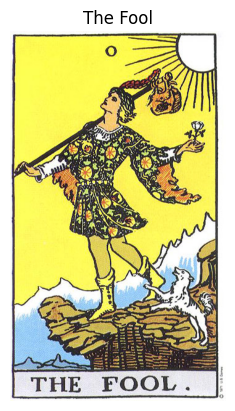

Number: 
0

Arcana: 
Major Arcana

Suit: 
Trump

Numerology: 
0 (off the scale; pure potential)

Element: 
Air



In [9]:
tarot_information(df, 0)

In [16]:
import datetime

def tarot_reading(dataframe):

    reading = dataframe.sample(n = 3).reset_index(drop=True)    
    today = datetime.date.today()
    date = today.strftime("%d-%B-%Y")
    
    # identify images
    name_img_past = reading['img'].iloc[0]
    name_img_present = reading['img'].iloc[1]
    name_img_future = reading['img'].iloc[2]

    # open images
    img_past = PIL.Image.open(f'/workspaces/tarot/archive 2/cards/{name_img_past}')
    img_present = PIL.Image.open(f'/workspaces/tarot/archive 2/cards/{name_img_present}')
    img_future = PIL.Image.open(f'/workspaces/tarot/archive 2/cards/{name_img_future}')
    # plot images
    fig, (past, present, future) = plt.subplots(1, 3, figsize=(10,5.5))
    fig.suptitle('Your reading: Past, Present, Future on {}'.format(date))
    past.imshow(img_past)
    past.axis('off')
    past.set_title(reading['name'].iloc[0])
    present.imshow(img_present)
    present.axis('off')
    present.set_title(reading['name'].iloc[1])
    future.imshow(img_future)
    future.axis('off')
    future.set_title(reading['name'].iloc[2])
    plt.show()

    # Outcomes
    print('My dearest, your fortune reading is about your past, present and future.')
    print('')
    print('Regarding your past: ')
    print(reading['fortune_telling_1'].iloc[0])
    print(reading['fortune_telling_2'].iloc[0])
    print(reading['fortune_telling_3'].iloc[0])
    print('')
    print('Regarding your present: ')
    print(reading['fortune_telling_1'].iloc[1])
    print(reading['fortune_telling_2'].iloc[1])
    print(reading['fortune_telling_3'].iloc[1])
    print('')
    print('Regarding your future: ')
    print(reading['fortune_telling_1'].iloc[2])
    print(reading['fortune_telling_2'].iloc[2])
    print(reading['fortune_telling_3'].iloc[2])

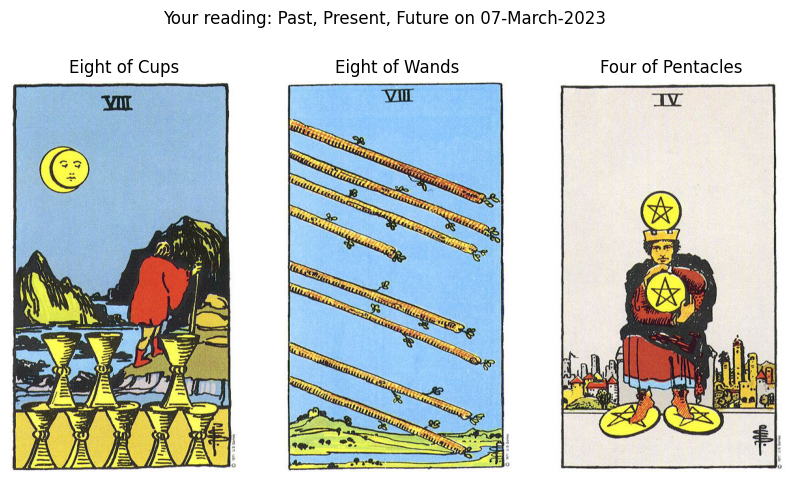

My dearest, your fortune reading is about your past, present and future.

Regarding your past: 
Someone's "stepping out" on you, now or in the near future
Maybe it's time to quit talking about the problem and just move on
nan

Regarding your present: 
Watch for a surprising letter in the mail
Your whole world is about to be turned on its ear
nan

Regarding your future: 
A rainy day is coming—it's time to save
nan
nan


Bad pipe message: %s [b"\\\xf7\xa9\x13\x8f\xd2&Y\x972'\x07\x82\xa9\xeb\x9c\x0e9 h\xbd\xd8\xaa\xa2ug9V\x16\x10!\xd2\xc6'\xb2\xde\xefa\x19\x13\x0e\xaeGa\xbd\xd5D\xd1\xe8\x08\xde\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08", b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\xb9\x89^\xed\x7f\x19\xbf\xd2Q"\xea\x96\xf2\xe6^\xe7\xb5\x92\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0\'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d']
Bad pipe message: %s [b'\x0

In [17]:
tarot_reading(df)